## Data Exploration

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
# warnings.filterwarnings('ignore')

In [2]:
# Import cleaned data

df = pd.read_csv('maryland_vehicle_crashes_cleaned_data.csv')
df.head()

,report_no,acc_date_time,quarter,light_desc,county_desc,junction_desc,collision_type_desc,surf_cond_desc,rd_cond_desc,rd_div_desc,...,c_m_zone_flag,agency_code,harm_event_desc1,harm_event_desc2,logmile_dir_flag_desc,mainroad_name,feet_miles_flag_desc,reference_road_name,longitude,latitude
0,AE58770052,2020-06-18 15:15:00,Q2,Daylight,Baltimore,Not Recorded,Other,Not Recorded,Not Recorded,Not Recorded,...,N,BACOPD,Parked Vehicle,Not Applicable,Not Recorded,Not Recorded,Not Recorded,Not Recorded,-76.503693,39.277263
1,MCP2539001Y,2022-04-22 22:49:00,Q2,Dark Lights On,Montgomery,Not Recorded,Other,Not Recorded,Not Recorded,Not Recorded,...,N,MONTGOMERY,Other Vehicle,Not Applicable,Not Recorded,Not Recorded,Not Recorded,Not Recorded,-77.097021,38.992210
2,AE63330016,2020-10-27 17:50:00,Q4,Not Recorded,Baltimore,Not Recorded,Other,Not Recorded,Not Recorded,Not Recorded,...,N,BACOPD,Other Vehicle,Not Applicable,Not Recorded,Not Recorded,Not Recorded,Not Recorded,-76.503080,39.323620
3,AE6418003H,2022-02-26 12:00:00,Q1,Daylight,Baltimore,Not Recorded,Other,Not Recorded,Not Recorded,Not Recorded,...,N,BACOPD,Other Vehicle,Not Applicable,Not Recorded,Not Recorded,Not Recorded,Not Recorded,-76.628028,39.411213
4,AE51570010,2022-12-12 15:45:00,Q4,Daylight,Baltimore,Not Recorded,Same Movement Angle,Not Recorded,Not Recorded,Not Recorded,...,N,BACOPD,Parked Vehicle,Not Applicable,Not Recorded,Not Recorded,Not Recorded,Not Recorded,-76.724014,39.377559


In [3]:
# Set pd view, column size and col width to max
# convert the column labels to lowercase

pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
df.columns = df.columns.str.lower()

In [4]:
# Summary statistics

df.describe(include='all')

,report_no,acc_date_time,quarter,light_desc,county_desc,junction_desc,collision_type_desc,surf_cond_desc,rd_cond_desc,rd_div_desc,fix_obj_desc,report_type,weather_desc,signal_flag_desc,c_m_zone_flag,agency_code,harm_event_desc1,harm_event_desc2,logmile_dir_flag_desc,mainroad_name,feet_miles_flag_desc,reference_road_name,longitude,latitude
count,878343,878343,878343,878343,878343,878343,878343,878343,878343,878343,878343,878343,878343,878343,878343,878343,878343,878343,878343,878343,878343,878343,878343.000000,878343.000000
unique,878322,730331,4,10,25,11,19,9,12,8,14,4,14,2,3,123,27,26,5,57457,3,80796,NaN,NaN
top,MCP32110012,2017-12-15 15:00:00,Q4,Daylight,Baltimore,Non Intersection,Same Direction Rear End,Dry,No Defects,"Two-way, Not Divided",Not Applicable,Property Damage Crash,Not Recorded,No,N,MSP,Not Recorded,Not Applicable,North,Not Recorded,Not Recorded,Not Recorded,NaN,NaN
freq,2,11,239074,522916,162216,305282,220954,582723,735408,310418,643776,550429,427866,637192,866318,186254,595459,565439,363405,86840,578947,87640,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-76.745367,39.144806
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.469052,0.311044
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-79.996100,37.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-76.940603,38.981626
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-76.710888,39.224338
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-76.574076,39.346372


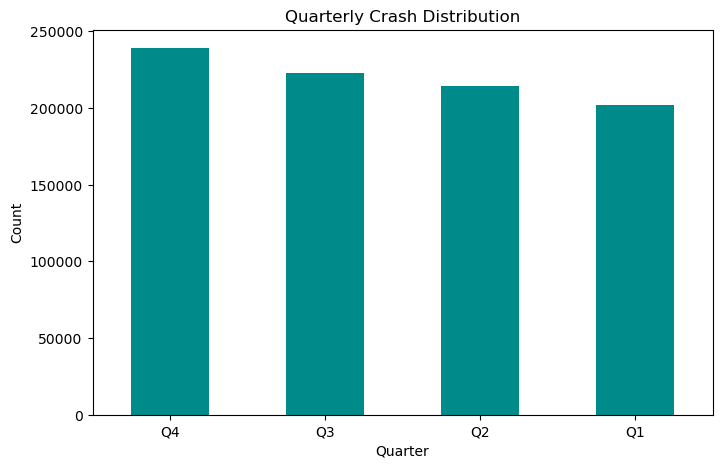

In [5]:
# Quarter comparisons

quarter_counts = df['quarter'].value_counts()
plt.figure(figsize=(8, 5))  
quarter_counts.plot(kind='bar', color='darkcyan')
plt.title('Quarterly Crash Distribution')
plt.xlabel('Quarter')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

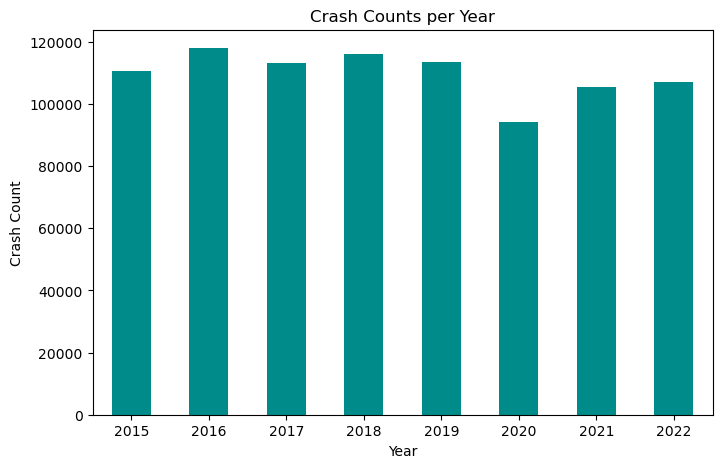

In [6]:
# Year comparisions (Which year had the the most crashes?)

df['acc_date_time']=pd.to_datetime(df['acc_date_time'])
df['year'] = df['acc_date_time'].dt.year
year_counts = df['year'].value_counts().sort_index()

plt.figure(figsize=(8, 5))  
year_counts.plot(kind='bar', color='darkcyan')
plt.title('Crash Counts per Year')
plt.xlabel('Year')
plt.ylabel('Crash Count')
plt.xticks(rotation=0)
plt.show()

In [7]:
# What's the average crash per year in MD?

print (year_counts.mean(),'vehicle crashes in Maryland per year.')

109792.875 vehicle crashes in Maryland per year.


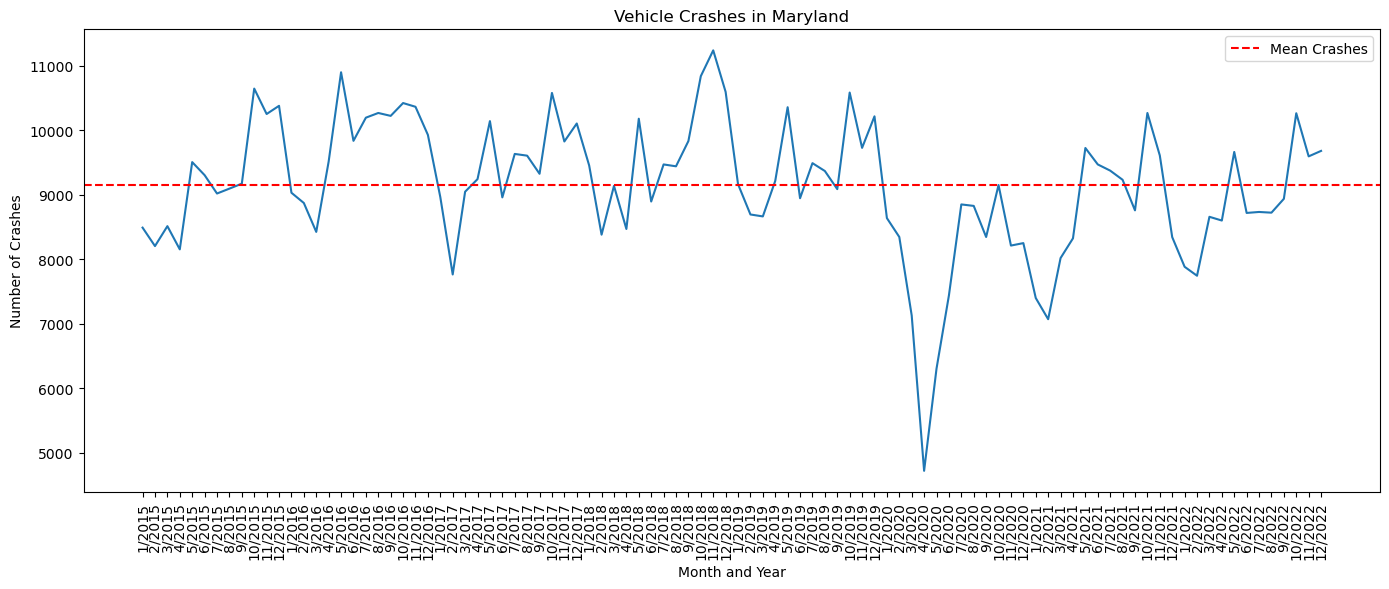

In [8]:
# Accidents by month

df['month'] = df['acc_date_time'].dt.month
month_counts = df['month'].value_counts().sort_index()

crashes_by_month_year = df.groupby(['year', 'month']).size().reset_index(name='count')
crashes_by_month_year = crashes_by_month_year.sort_values(['year','month'])   

mean_accidents = crashes_by_month_year['count'].mean()

months = crashes_by_month_year['month']
years = crashes_by_month_year['year']

plt.figure(figsize=(14, 6))
plt.plot(range(len(crashes_by_month_year)), crashes_by_month_year['count'])
plt.axhline(mean_accidents, color='red', linestyle='--', label='Mean Crashes')
plt.xlabel('Month and Year')
plt.ylabel('Number of Crashes')
plt.title('Vehicle Crashes in Maryland')
plt.xticks(range(len(crashes_by_month_year)), 
           [f"{months[i]}/{years[i]}" for i in range(len(crashes_by_month_year))], rotation=90)
plt.tight_layout()
plt.legend()
plt.show()

In [9]:
# What's the average crash per month in MD?

print (crashes_by_month_year['count'].mean(),'vehicle crashes in Maryland per month.')

9149.40625 vehicle crashes in Maryland per month.


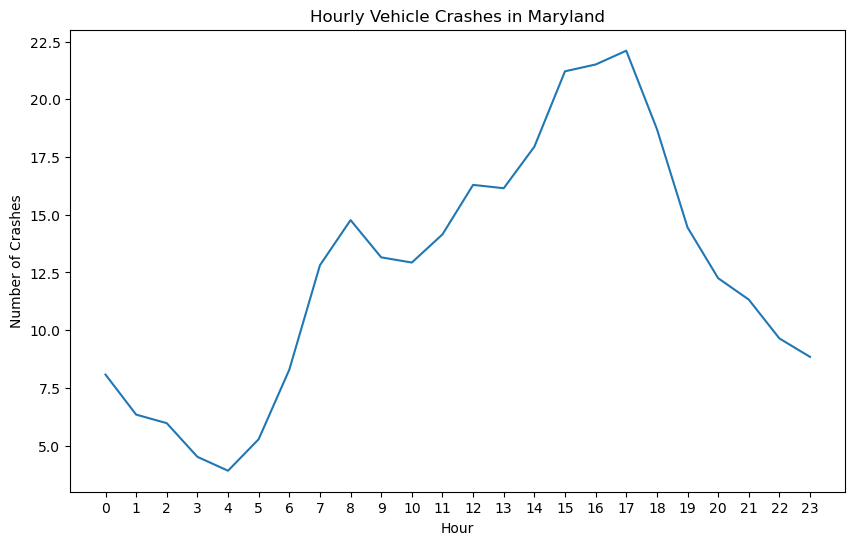

In [10]:
# At what hour do most vehicle crashes happen in MD?

df['hour'] = df['acc_date_time'].dt.hour
hour_counts = df['hour'].value_counts().sort_index()

crashes_per_hour = hour_counts / (df['acc_date_time'].dt.date.nunique())

plt.figure(figsize=(10, 6))
plt.plot(range(len(hour_counts)), crashes_per_hour)
plt.xlabel('Hour')
plt.ylabel('Number of Crashes')
plt.title('Hourly Vehicle Crashes in Maryland')
plt.xticks(range(len(hour_counts)),hour_counts.index)
plt.show()

In [11]:
# Light description counts

df['light_desc'].value_counts()

Daylight                   522916
Dark Lights On             202797
Dark No Lights              63305
Not Recorded                37318
Unknown                     14921
Not Applicable              14462
Dusk                         7887
Dawn                         7310
Dark - Unknown Lighting      4818
Other                        2609
Name: light_desc, dtype: int64

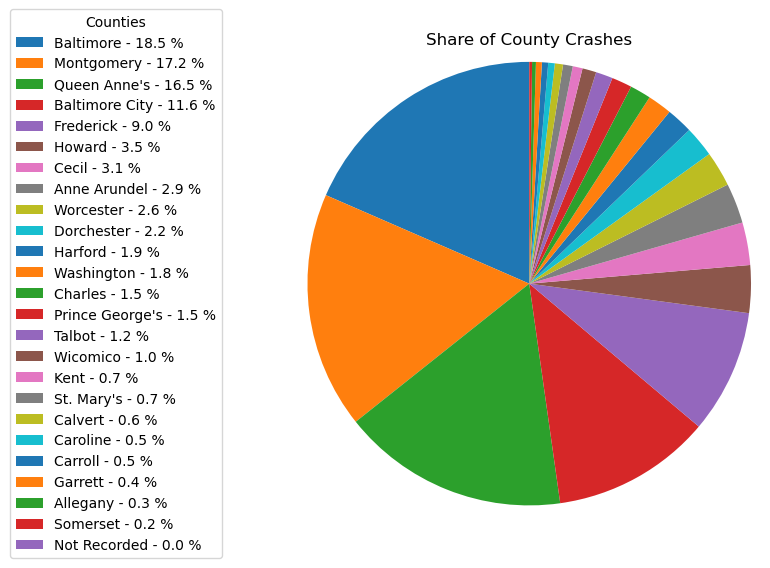

In [12]:
# County share of vehicle crashes

county_counts = df['county_desc'].value_counts()
counties = df['county_desc'].unique()

plt.figure(figsize=(10, 6))

percent = county_counts*100/county_counts.sum()

patches, texts = plt.pie(county_counts, startangle=90, radius=1.2)
labels = ['{0} - {1:1.1f} %'.format(i,j) for i,j in zip(counties, percent)]

plt.title('Share of County Crashes')
plt.legend(patches, labels, title='Counties', loc='center right', bbox_to_anchor=(-0.15, 0.5), fontsize=10)
plt.show()

# The top 5 counties account for 72% of vehicle crashes in MD

In [13]:
# Location description

pd.DataFrame(df['junction_desc'].value_counts())

,junction_desc
Non Intersection,305282
Intersection,219733
Not Applicable,149571
Not Recorded,118224
Intersection Related,73699
Interchange Related,5227
Commercial Driveway,3075
Crossover Related,1329
Residential Driveway,1262
Alley,860


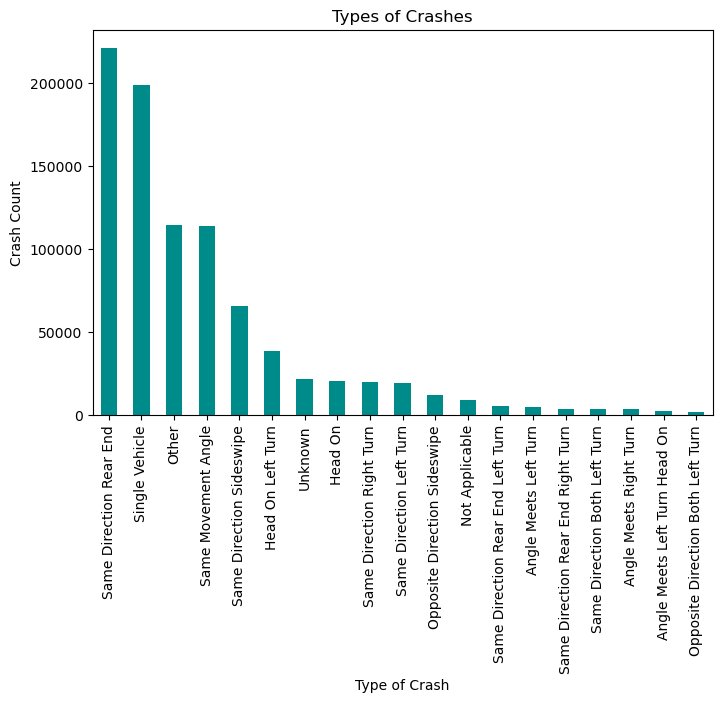

In [14]:
# Types of crashes

crash_type_count = df['collision_type_desc'].value_counts()

plt.figure(figsize=(8, 5))  

crash_type_count.plot(kind='bar', color='darkcyan')
plt.title('Types of Crashes')
plt.xlabel('Type of Crash')
plt.ylabel('Crash Count')
plt.xticks(rotation=90)
plt.show()

In [15]:
# Surface condition at the time of crash

surface_condition = pd.DataFrame(df['surf_cond_desc'].value_counts())
surface_condition['percent'] = round(surface_condition['surf_cond_desc']/(surface_condition['surf_cond_desc'].sum())*100,1)
surface_condition

,surf_cond_desc,percent
Dry,582723,66.3
Wet,147619,16.8
Not Recorded,89236,10.2
Not Applicable,33261,3.8
Snow,9180,1.0
Ice,8642,1.0
Unknown,6320,0.7
Other,853,0.1
"Mud, Dirt, Gravel",509,0.1


In [16]:
df.columns

Index(['report_no', 'acc_date_time', 'quarter', 'light_desc', 'county_desc',
       'junction_desc', 'collision_type_desc', 'surf_cond_desc',
       'rd_cond_desc', 'rd_div_desc', 'fix_obj_desc', 'report_type',
       'weather_desc', 'signal_flag_desc', 'c_m_zone_flag', 'agency_code',
       'harm_event_desc1', 'harm_event_desc2', 'logmile_dir_flag_desc',
       'mainroad_name', 'feet_miles_flag_desc', 'reference_road_name',
       'longitude', 'latitude', 'year', 'month', 'hour'],
      dtype='object')

In [17]:
# Road condition at the time of crash

road_condition = pd.DataFrame(df['rd_cond_desc'].value_counts())
road_condition['percent'] = round(road_condition['rd_cond_desc']/(road_condition['rd_cond_desc'].sum())*100,1)
road_condition

,rd_cond_desc,percent
No Defects,735408,83.7
Not Recorded,86831,9.9
Not Applicable,40065,4.6
"Holes, Ruts, Etc.",3658,0.4
Other,3584,0.4
Unknown,3191,0.4
Loose Surface Material,2161,0.2
Foreign Material,1749,0.2
Shoulder Defect,881,0.1
View Obstructed,591,0.1


In [18]:
road_type = pd.DataFrame(df['rd_div_desc'].value_counts())
road_type

,rd_div_desc
"Two-way, Not Divided",310418
"Two-way, Divided, Positive Median Barrier",273421
Not Recorded,91486
"Two-way, Divided, Unprotected (painted >4 feet) Median",89577
One-way Trafficway,70096
Not Applicable,22921
Other,18786
Unknown,1638


In [19]:
# Visualize location of crashes

# import folium

# m = folium.Map(location=[df['latitude'].iloc[0], df['longitude'].iloc[0]], zoom_start=8, tiles='CartoDB positron')

# df_locations = pd.DataFrame(df[['longitude','latitude']])
# df_locations